# Load and Explore the Dataset

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris= load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

#Train the Decision Tree Classifier

In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd


In [5]:
x=pd.DataFrame(iris.data,columns=iris.feature_names)
y=iris.target
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=88,test_size=0.17)

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
tree = DecisionTreeClassifier(random_state=72)
tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=72)

#Visualize the Tree

######Method 1: Using plot_tree (Simpler, but might be less detailed for larger trees)

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

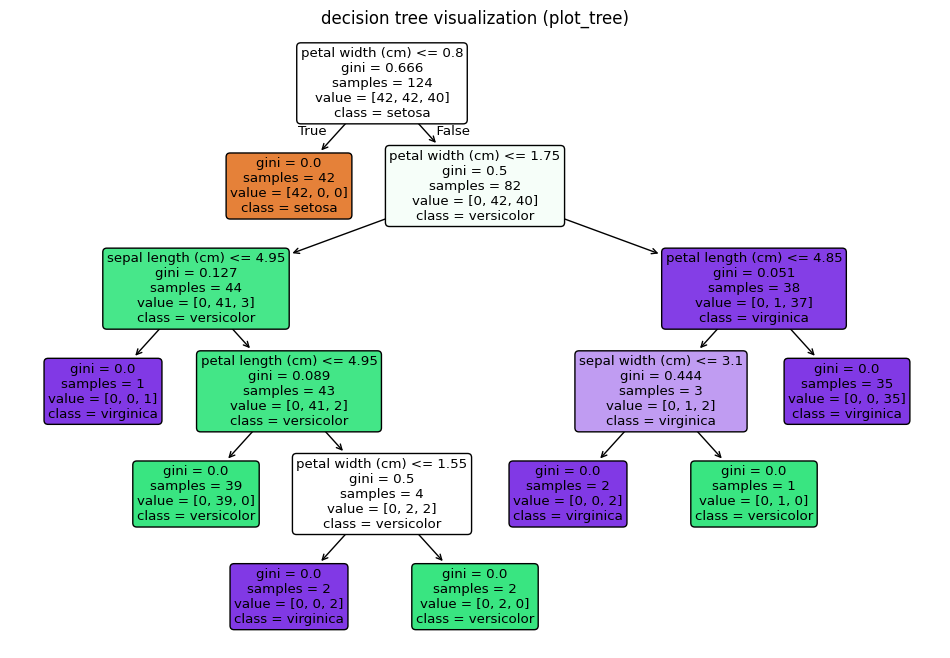

In [11]:
plt.figure(figsize=(12,8))
plot_tree(tree,feature_names=iris.feature_names,class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.title("decision tree visualization (plot_tree)")
plt.show()

######Method 2: Using graphviz (More detailed and often better for complex trees)

In [12]:
from sklearn.tree import export_graphviz
import graphviz

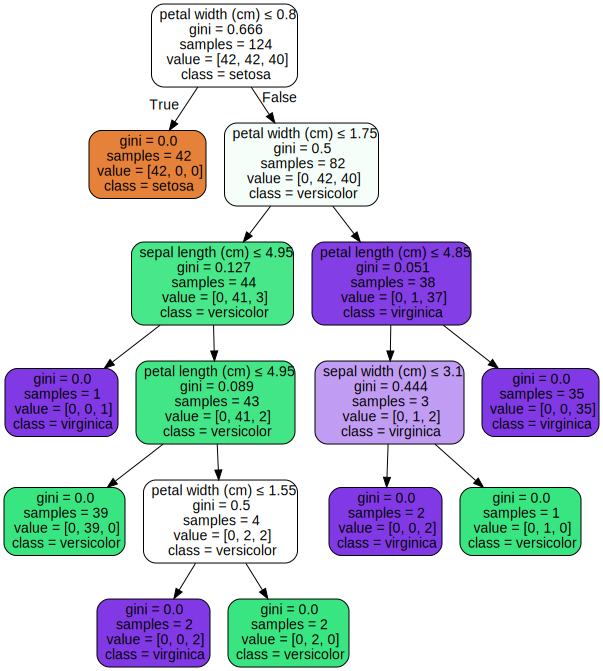

In [18]:
# Export the decision tree to a DOT format file
dot_data = export_graphviz(tree,
                           out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Create a Graphviz graph from the DOT data
graph = graphviz.Source(dot_data)

graph

#Evaluate the model

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [20]:
import seaborn as sns

In [21]:
y_pred = tree.predict(x_test)

In [22]:
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.9230769230769231

In [23]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[8, 0, 0],
       [0, 7, 1],
       [0, 1, 9]])

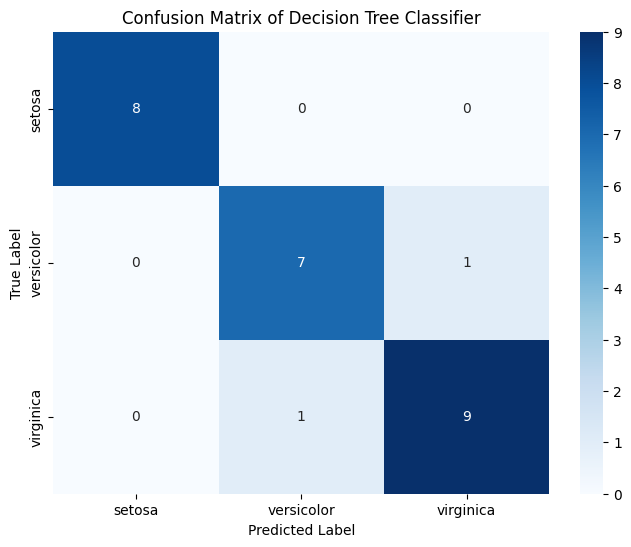

In [24]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Decision Tree Classifier')
plt.show()